# <center><b><h1>All Patients (Evaluation)</h1></b></center>

In [1]:
import itertools
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from math import cos, sin, atan
import numpy as np
from operator import itemgetter
import pandas as pd
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,confusion_matrix, precision_score, f1_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import spearmanr, pearsonr

## 1. Load the data

### 1.1 Validation and Test sets

In [2]:
df_X_test = pd.read_csv("../../../Data/all_patients/X_test.csv", index_col=0)
df_X_test.shape

(30777, 16)

In [3]:
df_y_test = pd.read_csv("../../../Data/all_patients/y_test.csv", index_col=0)
df_y_test.shape

(30777, 1)

In [4]:
df_X_val = pd.read_csv("../../../Data/all_patients/X_val.csv", index_col=0)
df_X_val.shape

(30777, 16)

In [5]:
df_y_val = pd.read_csv("../../../Data/all_patients/y_val.csv", index_col=0)
df_y_val.shape

(30777, 1)

### 1.2 Neural Network models

In [6]:
model_folder_base = '../../../Models/Neural_Networks/all_patients/'

In [7]:
models = dict()

In [8]:
for base in ['05','1']:
    model_path = model_folder_base+'base_ratio_'+base+'/NeuralNetwork - All_Patients - First Run - Base Ratio '+base+'_model.pkl'
    models.update({
        'base_ratio_'+base: {
            'model': joblib.load(model_path),
            'path' : model_path
        }
    })
    for percent in range(1,6):
        for ratio in ['05','1']:
            model_path = model_folder_base+'base_ratio_'+base+'/'+str(percent)+'0_percent/NeuralNetwork - All_Patients - Second Run - '+str(percent)+'0 Percent - Ratio '+ratio+'_model.pkl'
            models.update({
                'base_ratio_'+base+'_'+str(percent)+'0_percent_ratio_'+ratio: {
                    'model': joblib.load(model_path),
                    'path' : model_path
                }
            })
len(models)#### Models trained with a Base Ratio of 1 between the classes

22

In [9]:
#x = models['base_ratio_05_10_percent_ratio_1']['model']

## 2. Models Comparison

### 2.1 Computing the predictions and storing metrics

In [10]:
for key,element in models.items():
    path = element['path']
    model = element['model']
    predictions = model.predict(df_X_val.values)
    conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
    tp, fp, fn, tn = conf_mat.ravel()
    fpr, tpr, thresholds = roc_curve(df_y_val, predictions)
    models.update({
        key : {
            'model' : model,
            'path'  : path,
            'predictions' : predictions,
            'tp' : tp,
            'fp' : fp,
            'fn' : fn,
            'tn' : tn,            
            'recall' : tp/(tp+fn),
            'auc' : roc_auc_score(df_y_val, predictions),
            'f1-score' : f1_score(df_y_val,predictions),
            'precision' : tp / float(tp+fp),
            'fpr' : fpr,
            'tpr' : tpr,
            'thresholds' : thresholds,
        }
    })

In [11]:
len(models)

22

### 2.3 Resume table of models' metrics and features

In [12]:
models_df = pd.DataFrame(models).transpose()
models_df = models_df[['model','path','predictions','tp', 'fp', 'fn', 'tn', 'recall', 'auc', 'f1-score', 'precision', 'fpr', 'tpr', 'thresholds']]
models_df.drop(columns=['model','path','predictions'], axis=1, inplace=True)

In [13]:
models_df

,tp,fp,fn,tn,recall,auc,f1-score,precision,fpr,tpr,thresholds
base_ratio_05,24269,6452,31,25,0.998724,0.618205,0.00765345,0.789981,"[0.0, 0.21001920510400052, 1.0]","[0.0, 0.44642857142857145, 1.0]","[2, 1, 0]"
base_ratio_05_10_percent_ratio_05,26511,4210,12,44,0.999548,0.824337,0.0204176,0.86296,"[0.0, 0.13703980990202141, 1.0]","[0.0, 0.7857142857142857, 1.0]","[2, 1, 0]"
base_ratio_05_10_percent_ratio_1,23396,7325,9,47,0.999615,0.800425,0.0126548,0.761564,"[0.0, 0.2384362488200254, 1.0]","[0.0, 0.8392857142857143, 1.0]","[2, 1, 0]"
base_ratio_05_20_percent_ratio_05,26432,4289,11,45,0.999584,0.83198,0.0205011,0.860389,"[0.0, 0.13961134077666743, 1.0]","[0.0, 0.8035714285714286, 1.0]","[2, 1, 0]"
base_ratio_05_20_percent_ratio_1,24744,5977,10,46,0.999596,0.813436,0.0151341,0.805443,"[0.0, 0.19455746883239478, 1.0]","[0.0, 0.8214285714285714, 1.0]","[2, 1, 0]"
base_ratio_05_30_percent_ratio_05,26820,3901,27,29,0.998994,0.695438,0.0145509,0.873018,"[0.0, 0.12698154356954527, 1.0]","[0.0, 0.5178571428571429, 1.0]","[2, 1, 0]"
base_ratio_05_30_percent_ratio_1,24934,5787,18,38,0.999279,0.745099,0.012923,0.811627,"[0.0, 0.1883727743237525, 1.0]","[0.0, 0.6785714285714286, 1.0]","[2, 1, 0]"
base_ratio_05_40_percent_ratio_05,26376,4345,32,24,0.998788,0.643569,0.0108475,0.858566,"[0.0, 0.14143419810553043, 1.0]","[0.0, 0.42857142857142855, 1.0]","[2, 1, 0]"
base_ratio_05_40_percent_ratio_1,25422,5299,26,30,0.998978,0.681613,0.0111421,0.827512,"[0.0, 0.1724878747436607, 1.0]","[0.0, 0.5357142857142857, 1.0]","[2, 1, 0]"
base_ratio_05_50_percent_ratio_05,26363,4358,36,20,0.998636,0.607643,0.0090212,0.858143,"[0.0, 0.14185736141401648, 1.0]","[0.0, 0.35714285714285715, 1.0]","[2, 1, 0]"


### 2.4 ROC curves comparison

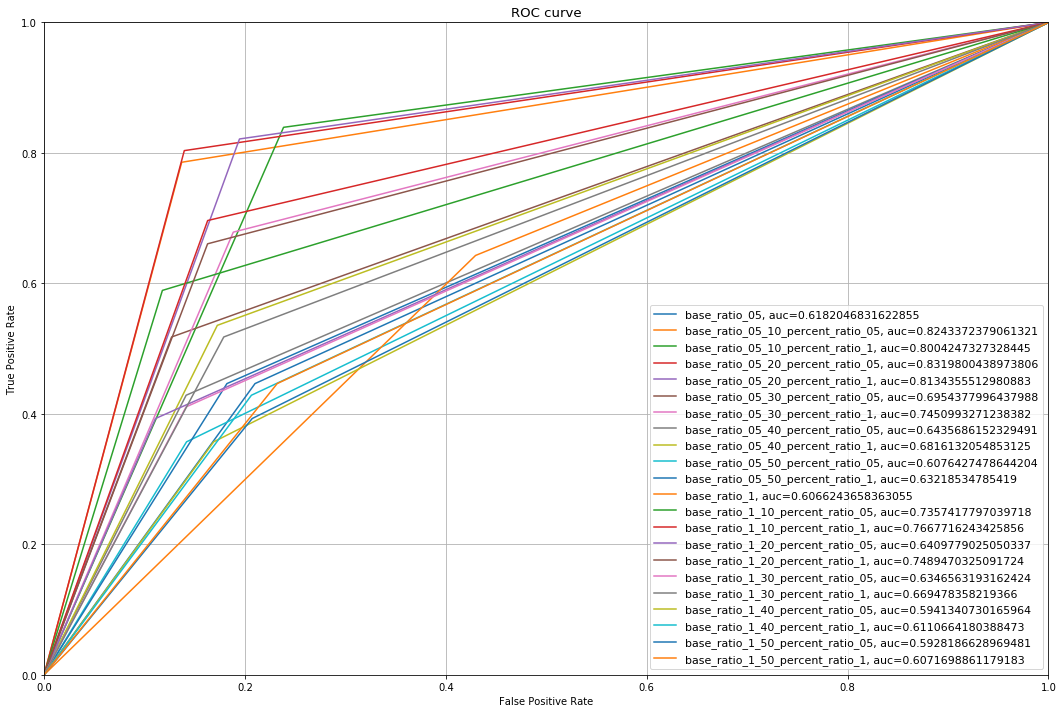

In [14]:
plt.figure(figsize=(18,12))
for name,model in models_df.iterrows():
    plt.plot(model.loc['fpr'], model.loc['tpr'], label=name+", auc="+str(model.loc['auc']))
    plt.legend(loc=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 11
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.savefig('All_Patients_validation_roc.png')

### 2.5 Best model selection

In [15]:
nn_models = sorted(models.values(), key=itemgetter('auc'), reverse=True)

In [16]:
best_nn_model = nn_models[0]['model']

In [17]:
for k,e in models.items():
    if e['path'] == nn_models[0]['path']:
        print('The Best Model is : ', k)
        break

The Best Model is :  base_ratio_05_20_percent_ratio_05


In [18]:
best_predictions = best_nn_model.predict(df_X_val.values)

## 3. Best model testing and metrics visualization

### 3.1 Classification Report 

In [19]:
class_repo = classification_report(df_y_test['Class'].values,best_predictions,target_names=['Non-Fracture','Fracture'], output_dict=True)
class_repo = pd.DataFrame(class_repo).transpose()

In [20]:
class_repo

,f1-score,precision,recall,support
Non-Fracture,0.923634,0.998260,0.859389,30716.0
Fracture,0.006826,0.003461,0.245902,61.0
micro avg,0.858173,0.858173,0.858173,30777.0
macro avg,0.465230,0.500861,0.552645,30777.0
weighted avg,0.921817,0.996289,0.858173,30777.0


### 3.2 Confusion Matrix

In [21]:
conf_mat_base_folder = '../../../Data/confusion_matrix/neural_network/best_model_based/'

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
pred_test = best_nn_model.predict(df_X_test.values)

In [24]:
conf_mat = confusion_matrix(df_y_test['Class'].values,pred_test)
tn, fp, fn, tp = conf_mat.ravel()
fpr, tpr, thresholds = roc_curve(df_y_test['Class'].values,pred_test)

In [25]:
conf_mat_df = pd.DataFrame([list(pd.Series([tp, fp, fn, tn]))],columns=['tp', 'fp', 'fn', 'tn'])
conf_mat_df.columns.names = ['model']
conf_mat_df.rename(index={0: 'All_Patients'},inplace=True)
conf_mat_df

model,tp,fp,fn,tn
All_Patients,41,4111,20,26605


Confusion matrix
[[26605  4111]
 [   20    41]]
Normalized confusion matrix
[[0.87 0.13]
 [0.33 0.67]]


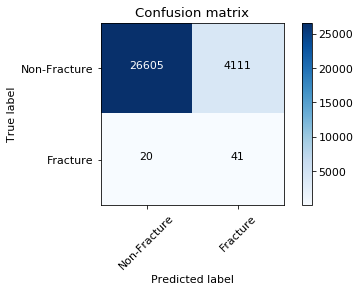

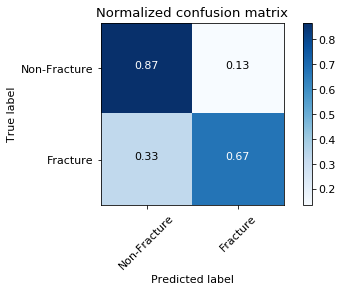

In [26]:
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['Non-Fracture', "Fracture"],
                      title='Confusion matrix')
plt.savefig(conf_mat_base_folder+'All_Patients_Best_nn_model_testset_confusion_matrix.png', bbox_inches="tight")

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['Non-Fracture', "Fracture"], normalize=True,
                      title='Normalized confusion matrix')
plt.savefig(conf_mat_base_folder+'All_Patients_Best_nn_model_testset_confusion_matrix_normalized.png', bbox_inches="tight")
plt.show()

### 3.3 ROC Curve and AUC

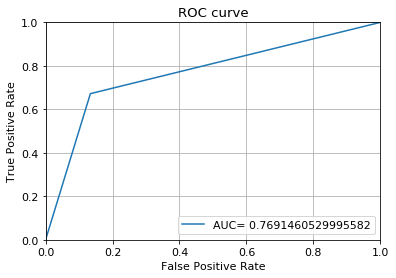

In [27]:
plt.plot(fpr,tpr, label = "AUC= "+str(roc_auc_score(df_y_test,pred_test)))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 11
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.savefig('All_Patients_Best_ROC.png')

### 3.4 Accuracy

In [28]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.865776391461156


### 3.5 Recall (or Sensitivity)

In [29]:
recall = tp / (tp+fn)
print("Recall : ", recall)
recall_score(df_y_test, pred_test)

Recall :  0.6721311475409836


0.6721311475409836

### 3.6 Classification Error

In [30]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.13422360853884394


### 3.7 Specificity

In [31]:
specificity = tn / (tn+fp)

print(specificity)

0.8661609584581326


### 3.8 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

# CONTROLLARE

In [32]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
#print(1 - specificity)

0.13383904154186743


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [33]:
precision = tp / float(tp+fp)

print(precision)

0.0098747591522158


## 6. Neural Network Visualization

In [34]:
nn_model_base_folder = '../../../Models/Neural_Networks/best_models/'

In [35]:
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        plt.gca().add_line(line)

    def draw(self, layerType=0):
        n_neurons = 0
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            n_neurons += 1
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            plt.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            plt.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            plt.text(x_text, self.y, 'Hidden Layer '+str(layerType)+" - "+str(n_neurons)+" neurons", fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        plt.figure(figsize=(38,8), dpi=300)
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        plt.axis('scaled')
        plt.axis('off')
        plt.title( 'Neural Network architecture', fontsize=15 )
        plt.savefig(nn_model_base_folder+'All_Patients_structure.png', bbox_inches="tight")
        plt.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

In [36]:
n_output = 1
nn_structure = []
nn_structure.append(df_X_test.shape[1])
for layer in best_nn_model.hidden_layer_sizes:
    nn_structure.append(layer)
nn_structure.append(n_output)

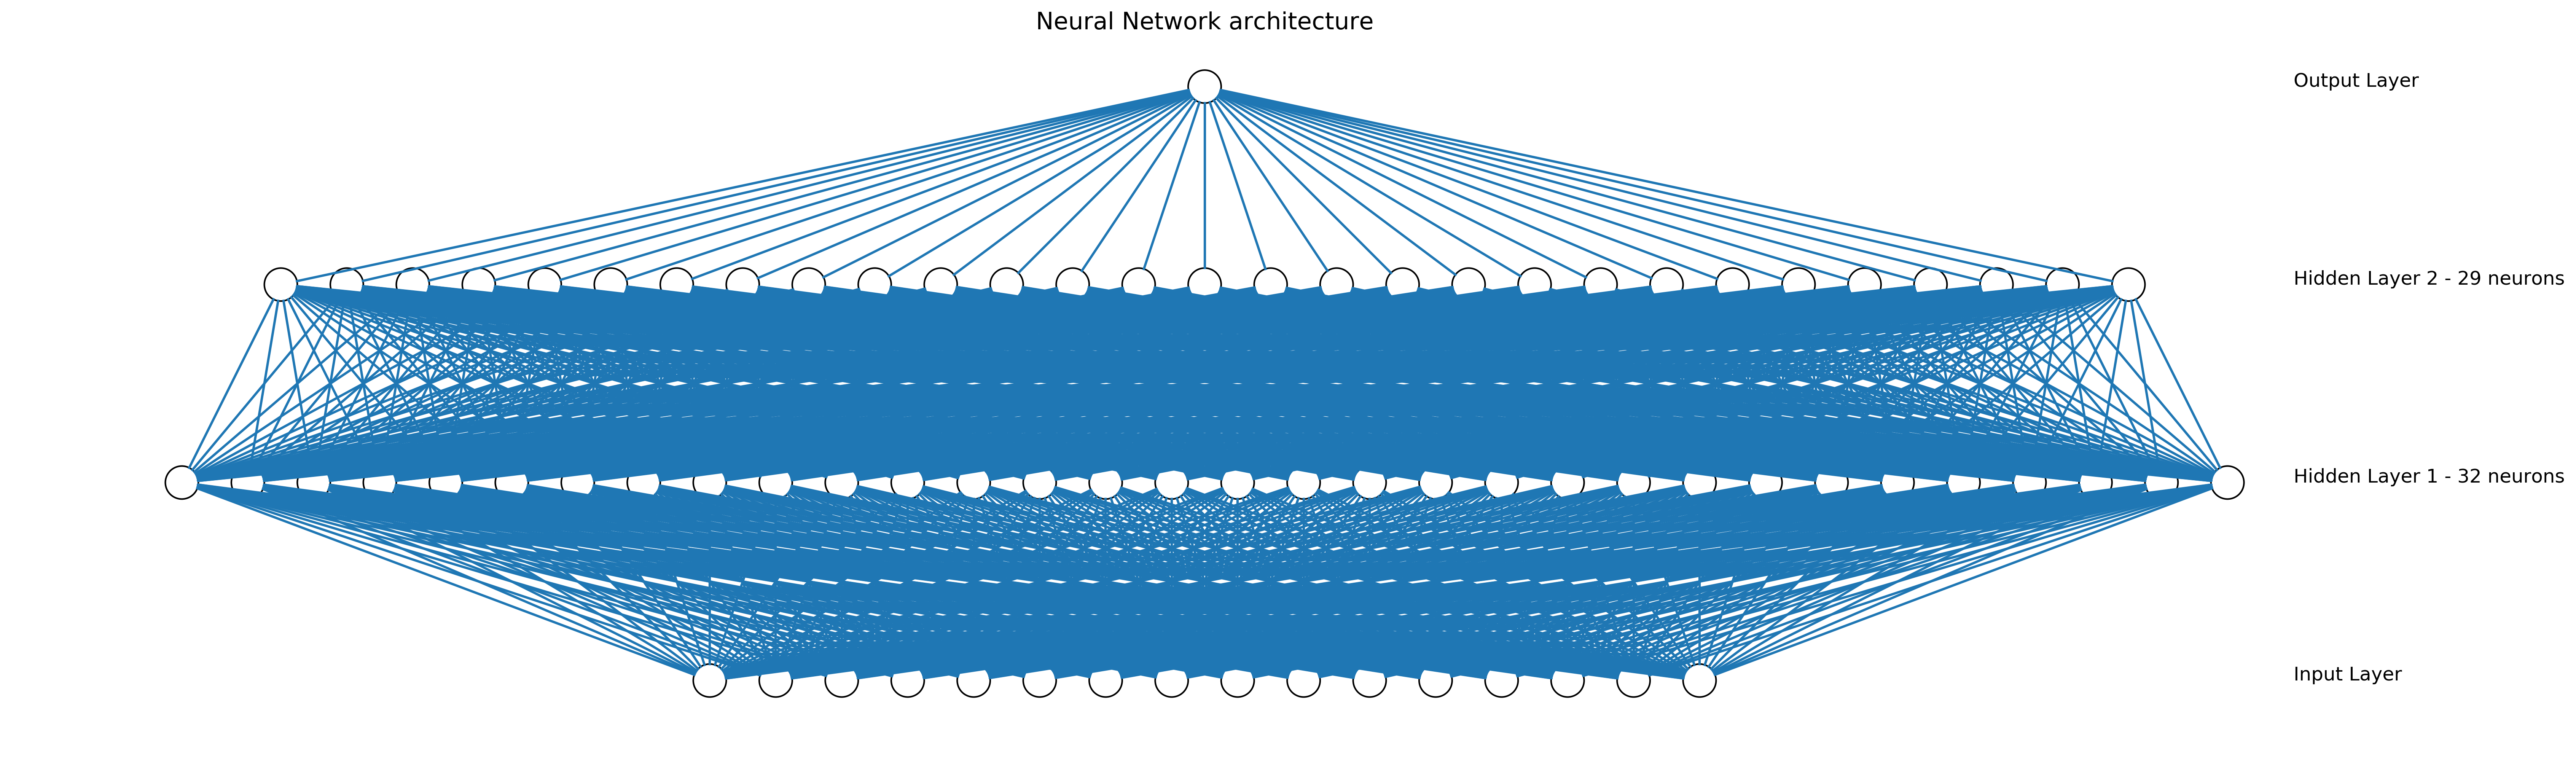

In [37]:
neural_network = DrawNN( nn_structure )
neural_network.draw()

## 7. Save best model to file

In [38]:
joblib.dump(best_nn_model, nn_model_base_folder+'All_Patients_Model.pkl')
conf_mat_df.to_csv(conf_mat_base_folder+'All_Patients.csv')